In [123]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
crimes_raw = pd.read_csv("formatted/crimes.csv")
crimes_raw.head()

,State,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,AK,155.132450,116.968699,106.403941,86.644951,91.364003,78.158397,81.119896,76.229731,68.797433,...,85.006394,93.983182,93.632825,83.176269,79.573398,86.265091,84.502190,85.340671,103.157207,114.571623
1,AL,185.751234,166.721273,160.476962,130.928309,121.216643,128.218390,124.952114,133.113160,134.066770,...,159.858215,157.575238,133.051359,101.642475,102.129842,104.202819,96.090274,97.020249,95.016868,96.354327
2,AR,125.684380,114.103586,111.533888,96.217494,79.329835,74.848508,80.936714,93.264969,81.641661,...,109.531653,97.254666,89.151915,81.086040,80.208754,78.309651,76.417019,68.659026,71.091488,70.944580
3,AZ,173.755334,167.773261,165.686059,165.238809,152.521842,146.258784,167.101127,147.028418,136.560259,...,154.036558,150.903513,124.306791,108.417725,110.478614,112.697788,100.316549,92.513015,93.288439,101.788021
4,CA,331.162747,295.570613,252.473038,210.554994,181.139782,177.874428,186.743166,185.612325,179.822682,...,193.433054,188.776643,173.403990,155.647576,144.069357,148.739951,139.573395,125.491428,135.564654,139.589748


In [125]:
new_crimes_df = crimes_raw[crimes_raw.State != 'DC']
new_crimes_df.head()

,State,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,AK,155.132450,116.968699,106.403941,86.644951,91.364003,78.158397,81.119896,76.229731,68.797433,...,85.006394,93.983182,93.632825,83.176269,79.573398,86.265091,84.502190,85.340671,103.157207,114.571623
1,AL,185.751234,166.721273,160.476962,130.928309,121.216643,128.218390,124.952114,133.113160,134.066770,...,159.858215,157.575238,133.051359,101.642475,102.129842,104.202819,96.090274,97.020249,95.016868,96.354327
2,AR,125.684380,114.103586,111.533888,96.217494,79.329835,74.848508,80.936714,93.264969,81.641661,...,109.531653,97.254666,89.151915,81.086040,80.208754,78.309651,76.417019,68.659026,71.091488,70.944580
3,AZ,173.755334,167.773261,165.686059,165.238809,152.521842,146.258784,167.101127,147.028418,136.560259,...,154.036558,150.903513,124.306791,108.417725,110.478614,112.697788,100.316549,92.513015,93.288439,101.788021
4,CA,331.162747,295.570613,252.473038,210.554994,181.139782,177.874428,186.743166,185.612325,179.822682,...,193.433054,188.776643,173.403990,155.647576,144.069357,148.739951,139.573395,125.491428,135.564654,139.589748


In [126]:
tidy_crimes = pd.melt(new_crimes_df, id_vars = ['State'], var_name='Year', value_name='crime_rate')
tidy_crimes.sort_values(by=['State','Year'], inplace=True)
tidy_crimes.head()

,State,Year,crime_rate
0,AK,1995,155.132450
50,AK,1996,116.968699
100,AK,1997,106.403941
150,AK,1998,86.644951
200,AK,1999,91.364003


In [127]:
crime_matrix = tidy_crimes.pivot("State", "Year", "crime_rate")
crime_matrix.head()

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,,,,,,,,,,,,,,,
AK,155.132450,116.968699,106.403941,86.644951,91.364003,78.158397,81.119896,76.229731,68.797433,67.958434,...,85.006394,93.983182,93.632825,83.176269,79.573398,86.265091,84.502190,85.340671,103.157207,114.571623
AL,185.751234,166.721273,160.476962,130.928309,121.216643,128.218390,124.952114,133.113160,134.066770,133.513797,...,159.858215,157.575238,133.051359,101.642475,102.129842,104.202819,96.090274,97.020249,95.016868,96.354327
AR,125.684380,114.103586,111.533888,96.217494,79.329835,74.848508,80.936714,93.264969,81.641661,86.254545,...,109.531653,97.254666,89.151915,81.086040,80.208754,78.309651,76.417019,68.659026,71.091488,70.944580
AZ,173.755334,167.773261,165.686059,165.238809,152.521842,146.258784,167.101127,147.028418,136.560259,134.515031,...,154.036558,150.903513,124.306791,108.417725,110.478614,112.697788,100.316549,92.513015,93.288439,101.788021
CA,331.162747,295.570613,252.473038,210.554994,181.139782,177.874428,186.743166,185.612325,179.822682,172.333950,...,193.433054,188.776643,173.403990,155.647576,144.069357,148.739951,139.573395,125.491428,135.564654,139.589748


Text(0.5,1,'Heatmap of crime rate from 1995 to 2016')

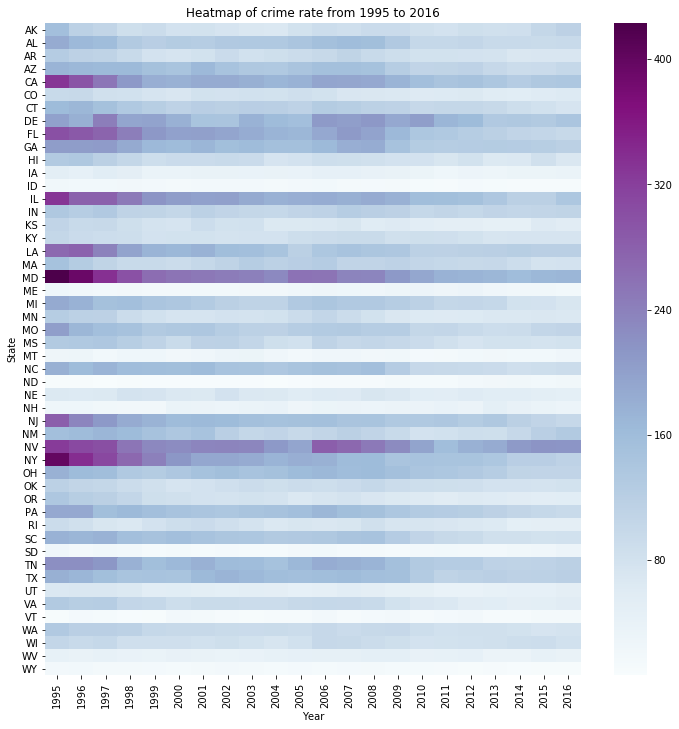

In [128]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(crime_matrix, cmap='BuPu')
r.set_title("Heatmap of crime rate from 1995 to 2016")

In [129]:
fig.savefig("heatmap_crime.png")